In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_file = "houses_Madrid.csv"
df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [5]:
df.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.000000,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,...,0.0,2.174200e+04,21742.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,7719.000000
mean,10870.500000,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,...,NaN,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN,2658.000518
std,6276.519112,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,...,NaN,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN,13360.966258
min,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5435.250000,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,...,NaN,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10870.500000,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,...,NaN,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16305.750000,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,...,NaN,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21741.000000,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,...,NaN,8.800000e+06,18889.000000,8170.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


### Handling missing values 

If missing values, can be removed or imputed using Median values (for the categorical) based on the impact

In [7]:
missing_values_n_rooms = df['n_rooms'].isnull().sum()
print(missing_values_n_rooms)

0


### To understand correlation between N rooms and Propertz buy price

Positive correlation 
* As N rooms increases, property price increases

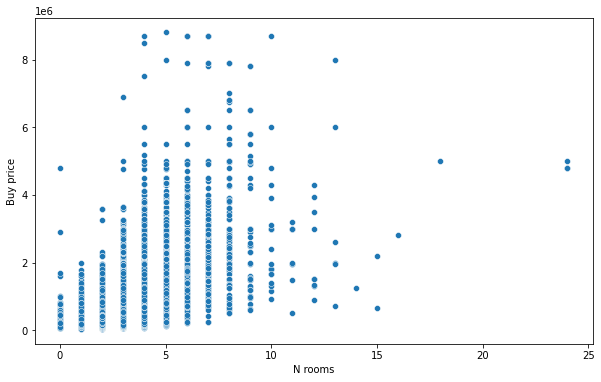

In [10]:
import seaborn as sns 

plt.figure(figsize=(10,6))
sns.scatterplot(x='n_rooms', y='buy_price', data = df)
plt.title = ('Scatterplot of N rooms vs Buy price')
plt.xlabel('N rooms')
plt.ylabel('Buy price')
plt.show()

TypeError: __init__() takes 2 positional arguments but 3 were given

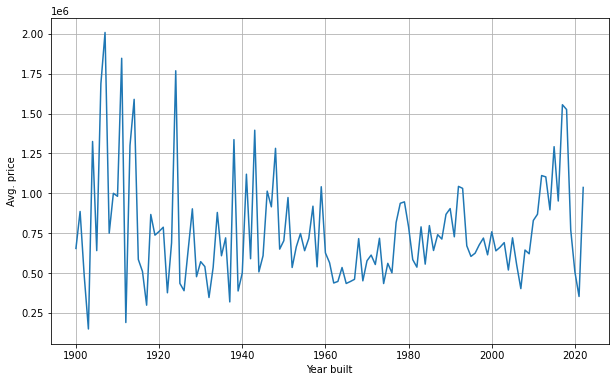

In [15]:
min_valid_year = 1900
max_valid_year = 2023

filtered_df = df[(df['built_year'] >= min_valid_year) & (df['built_year'] <= max_valid_year) ]

time_series = filtered_df.groupby('built_year')['buy_price'].mean()
plt.figure(figsize=(10,6))
time_series.plot()
plt.title = ('Avg. buy price over time')
plt.xlabel('Year built')
plt.ylabel('Avg. price')
plt.grid(True)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}M", format(x/1e6)))
plt.show()